Top Wide Receivers by Team based on Impact Metrics:
    Team               Player    Y/G  R/G
106  2TM        Van Jefferson   12.3  1.2
68   ARI       Michael Wilson   43.5  2.9
29   ATL         Drake London   56.6  4.3
21   BAL          Zay Flowers   53.6  4.8
5    BUF         Stefon Diggs   69.6  6.3
9    CAR         Adam Thielen   59.6  6.1
11   CHI           D.J. Moore   80.2  5.6
10   CIN        Ja'Marr Chase   76.0  6.3
25   CLE         Amari Cooper   83.3  4.8
0    DAL          CeeDee Lamb  102.9  7.9
43   DEN     Courtland Sutton   48.3  3.7
2    DET    Amon-Ra St. Brown   94.7  7.4
34   GNB          Jayden Reed   49.6  4.0
16   HOU         Nico Collins   86.5  5.3
3    IND  Michael Pittman Jr.   72.0  6.8
44   JAX       Christian Kirk   65.6  4.8
20   KAN          Rashee Rice   58.6  4.9
4    LAC         Keenan Allen   95.6  8.3
7    LAR           Puka Nacua   87.4  6.2
8    LVR        Davante Adams   67.3  6.1
1    MIA          Tyreek Hill  112.4  7.4
31   MIN     Justin Jeff

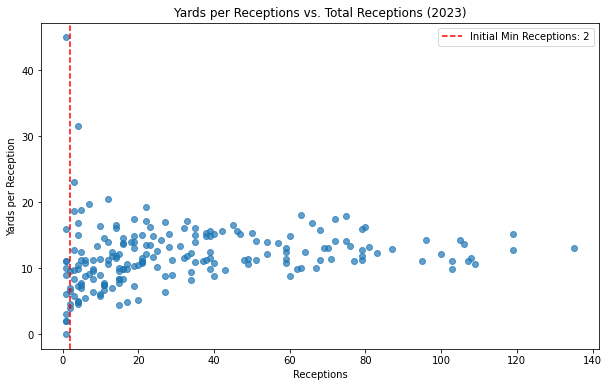

Suggested minimum attempts for determining impact based on stabilization: 0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the 2023 data file
file_path = '2023_Wide_Receiver_Stats.csv'  # Update this path as needed
data = pd.read_csv(file_path, header=1)

# Rename columns for easier access
data.columns = [
    'Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
    'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt', 'Fmb'
]

# Ensure the dataset is filtered to include only wide receivers
data = data[data['Pos'] == 'WR']

# Set a minimum attempts threshold and filter players with very low attempts 
min_receptions = 2
filtered_data = data[data['Rec'] >= min_receptions]

# Determine the top player for each team based on impact metrics 
top_players_per_team = filtered_data.sort_values(
    by=['Team', 'Y/G', 'R/G'],
    ascending=[True, False, False]
).groupby('Team').head(1)

print("Top Wide Receivers by Team based on Impact Metrics:")
print(top_players_per_team[['Team', 'Player', 'Y/G', 'R/G']])

# Determine the optimal minimum attempt threshold
# Plot yards per attempt vs attempts to identify stability
plt.figure(figsize=(10, 6))
plt.scatter(data['Rec'], data['Y/R'], alpha=0.7)
plt.axvline(min_receptions, color='red', linestyle='--', label=f'Initial Min Receptions: {min_receptions}')
plt.xlabel("Receptions")
plt.ylabel("Yards per Reception")
plt.title("Yards per Receptions vs. Total Receptions (2023)")
plt.legend()
plt.show()

# Calculate moving average to find the stabilization point in yards per attempt 
data_sorted = data.sort_values(by='Rec')
data_sorted['yards_per_reception_moving_avg'] = data_sorted['Y/R'].rolling(window=5, min_periods=1).mean()

# Find where the moving average stabilizes (low variance) 
variance_threshold = 0.05  # Define a variance threshold for stability
stabilizing_threshold = None

for i in range(len(data_sorted) - 5):
    variance = np.var(data_sorted['yards_per_reception_moving_avg'][i:i+5])
    if variance < variance_threshold:
        stabilizing_threshold = data_sorted['Rec'].iloc[i]
        break

print(f"Suggested minimum attempts for determining impact based on stabilization: {stabilizing_threshold}")


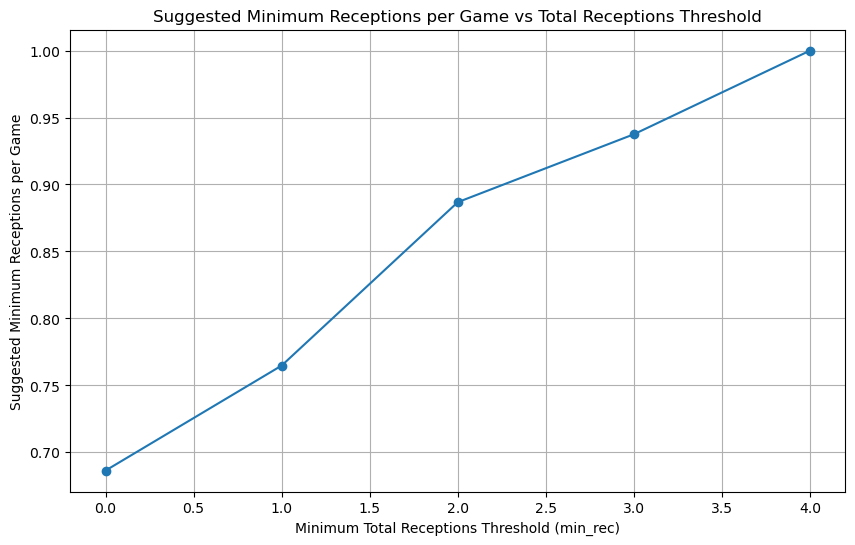

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the 2023 data file
file_path = '2023_Wide_Receiver_Stats.csv'  # Update this path as needed
data = pd.read_csv(file_path, header=1)

# Rename columns for easier access
data.columns = [
    'Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
    'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt', 'Fmb'
]

# Ensure the dataset is filtered to include only wide receivers
data = data[data['Pos'] == 'WR']

# Dictionary to store min attempts per game for each min_att threshold
min_rec_per_game_dict = {}

# Iterate over min attempt thresholds from 0 to 5
for min_rec in range(0, 5):
    # Filter data based on the current min_rec threshold and make a copy to avoid warnings
    filtered_data = data[data['Rec'] >= min_rec].copy()

    # Calculate attempts per game for filtered data
    filtered_data['Rec_per_game'] = filtered_data['Rec'] / filtered_data['G']

    # Calculate the 25th percentile of Att_per_game as the suggested min attempts per game
    if not filtered_data['Rec_per_game'].empty:  # Check if there's data left after filtering
        suggested_min_rec_per_game = np.percentile(filtered_data['Rec_per_game'], 25)
        min_rec_per_game_dict[min_rec] = suggested_min_rec_per_game

# Convert results to lists for plotting
min_rec_values = list(min_rec_per_game_dict.keys())
suggested_min_rec_per_game_values = list(min_rec_per_game_dict.values())

# Plot the suggested min attempts per game vs min_att
plt.figure(figsize=(10, 6))
plt.plot(min_rec_values, suggested_min_rec_per_game_values, marker='o', linestyle='-')
plt.xlabel("Minimum Total Receptions Threshold (min_rec)")
plt.ylabel("Suggested Minimum Receptions per Game")
plt.title("Suggested Minimum Receptions per Game vs Total Receptions Threshold")
plt.grid(True)
plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os

print("Current working directory:", os.getcwd())
# Load the 2023 data file
file_path = '2023_Wide_Receiver_Stats.csv'  # Update this path as needed
data = pd.read_csv(file_path, header=1)

# Rename columns for easier access
data.columns = [
    'Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'Tgt', 'Rec', 'Yds',
    'Y/R', 'TD', '1D', 'Succ%', 'Lng', 'R/G', 'Y/G', 'Ctch%', 'Y/Tgt', 'Fmb'
]

# Ensure the dataset is filtered to include only wide receivers
data = data[data['Pos'] == 'WR']

# Calculate additional impact metrics
data['Success_Rate'] = data['Succ%'] / 100  # Assuming Succ% is already a percentage

# Select the metrics for impact scoring
metrics = ['Y/G', 'R/G', 'Success_Rate']

# Normalize the metrics to bring them to a 0-1 range
scaler = MinMaxScaler()
data[metrics] = scaler.fit_transform(data[metrics])

# Calculate the final impact score as a weighted sum of metrics
data['Impact_Score'] = (
    0.45 * data['Y/G'] +
    0.35 * data['R/G'] +
    0.2 * data['Success_Rate']
)

# Sort and group by team to get the top player per team based on Impact Score
top_players_per_team = (
    data.sort_values(by=['Team', 'Impact_Score'], ascending=[True, False])
    .groupby('Team')
    .head(1)
)

# Display the top impactful running back for each team
print("Top Impactful Running Back per Team in 2023 based on Combined Impact Score:")
print(top_players_per_team[['Team', 'Player', 'Rec', 'Impact_Score', 'R/G', 'Y/G', 'Success_Rate']])


Current working directory: C:\Users\jacko\Documents\ECS-171\ProjectStuff
Top Impactful Running Back per Team in 2023 based on Combined Impact Score:
    Team               Player  Rec  Impact_Score       R/G       Y/G  \
129  2TM       Mecole Hardman   15      0.204276  0.168675  0.100534   
68   ARI       Michael Wilson   38      0.410244  0.349398  0.387011   
29   ATL         Drake London   69      0.513327  0.518072  0.503559   
21   BAL          Zay Flowers   77      0.528200  0.578313  0.476868   
5    BUF         Stefon Diggs  107      0.654310  0.759036  0.619217   
9    CAR         Adam Thielen  103      0.612641  0.734940  0.530249   
11   CHI           D.J. Moore   96      0.676430  0.674699  0.713523   
10   CIN        Ja'Marr Chase  100      0.683133  0.759036  0.676157   
25   CLE         Amari Cooper   72      0.642106  0.578313  0.741103   
0    DAL          CeeDee Lamb  135      0.872099  0.951807  0.915480   
43   DEN     Courtland Sutton   59      0.458196  0.445783 